### Logistics


**Deadline.** This project is due at 11:59pm on Friday 9/6. It's **much** better to be early than late, so start working now.

**Free Response Questions**: The free response questions and plots for the project are **optional** and ungraded, meaning you do **not** need to submit a PDF of this notebook to Gradescope. These questions tend to be open-ended. However, these questions will be very good practice for the free-response exam questions, so do give them a good effort. Solutions will be posted after the project late submission deadline.

**Partners.** You may work with one other partner. Your partner must be enrolled in the same lab as you are. Only one of you is required to submit the project. On [okpy.org](http://okpy.org), the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond.

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

To get started, load `datascience`, `numpy`, `pyplot`, and `ok`.

# San Diego Open Data

Details about the program


# Development: Possible questions
- Hypotheses:
  - need some to test
- Potholes
  - Regression to identify trends in city services. Are pothole repairs getting done more quickly? 
  - Does the responsiveness of city reports (time until case is closed) correspond to wealth/property value of neighborhood? 
- Illegal Dumping
  - Where is someone most likely to dump a mattress?
- Police Stops
  - Are numbers of violations for handheld cellphones going up (`23123.5 VC - NO HND HLD DEVICE W/DRIVE (I) 54655`)
  - others...

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# from client.api.notebook import Notebook
# ok = Notebook('project02.ok')
# _ = ok.auth(inline=True)

# 1. Pothole Requests
Pothole Requests: https://data.sandiego.gov/datasets/gid-pothole/
        

In [129]:
# get data
!wget -nc http://seshat.datasd.org/get_it_done_311/get_it_done_pothole_requests_datasd_v1.csv

--2019-08-26 06:46:40--  http://seshat.datasd.org/get_it_done_311/get_it_done_pothole_requests_datasd_v1.csv
Resolving seshat.datasd.org (seshat.datasd.org)... 52.216.171.50
Connecting to seshat.datasd.org (seshat.datasd.org)|52.216.171.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15595552 (15M) [binary/octet-stream]
Saving to: ‘get_it_done_pothole_requests_datasd_v1.csv’

get_it_done_pothole 100%[===================>]  14.87M  8.08MB/s    in 1.8s    

2019-08-26 06:46:42 (8.08 MB/s) - ‘get_it_done_pothole_requests_datasd_v1.csv’ saved [15595552/15595552]



In [130]:
pothole_requests = Table.read_table('get_it_done_pothole_requests_datasd_v1.csv')
pothole_requests.show(5)

service_request_id,service_request_parent_id,sap_notification_number,date_requested,case_age_days,service_name,case_record_type,date_updated,status,lat,lng,council_district,comm_plan_code,comm_plan_name,park_name,case_origin,referred,public_description
80508,52352,nan,2016-05-20T08:55:00,0,Pothole,TSW,2016-05-20T00:00:00,Closed,32.8319,-117.231,2,6,Clairemont Mesa,nan,Phone,nan,"test only, please dont create a notification"
80510,nan,nan,2016-05-20T09:05:00,0,Pothole,TSW,2016-05-20T00:00:00,Closed,32.716,-117.159,3,4,Downtown,nan,Web,nan,Test Only - Please close
80518,nan,1.50001e+11,2016-05-20T09:31:00,19,Pothole,TSW,2016-06-07T00:00:00,Closed,32.7603,-117.105,9,58,Mid-City:Kensington-Talmadge,nan,Phone,nan,4000 block of copeland just before you get on the freewa ...
80531,nan,1.50001e+11,2016-05-20T10:43:00,5,Pothole,TSW,2016-05-25T00:00:00,Closed,32.9559,-117.252,1,40,Torrey Pines,nan,Phone,nan,LARGE P/H CAUSED VEHICLE DAMAGE
80535,nan,nan,2016-05-20T11:14:00,0,Pothole,TSW,2016-05-20T00:00:00,Closed,32.7103,-117.155,3,4,Downtown,nan,Web,nan,This is a test. Please close when you receive.


In [41]:
cleaned_requests = pothole_requests.select('date_requested', 'date_updated', 'case_age_days', 'status', 'council_district', 'comm_plan_code', 'public_description')
# cleaned_requests.select('case_age_days').item(0)
cleaned_requests

date_requested,date_updated,case_age_days,status,council_district,comm_plan_code,public_description
2016-05-20T08:55:00,2016-05-20T00:00:00,0,Closed,2,6,"test only, please dont create a notification"
2016-05-20T09:05:00,2016-05-20T00:00:00,0,Closed,3,4,Test Only - Please close
2016-05-20T09:31:00,2016-06-07T00:00:00,19,Closed,9,58,4000 block of copeland just before you get on the freewa ...
2016-05-20T10:43:00,2016-05-25T00:00:00,5,Closed,1,40,LARGE P/H CAUSED VEHICLE DAMAGE
2016-05-20T11:14:00,2016-05-20T00:00:00,0,Closed,3,4,This is a test. Please close when you receive.
2016-05-20T11:58:00,2016-06-21T00:00:00,32,Closed,2,27,Caller reports cracks and potholes in alley
2016-05-20T12:26:00,2017-04-29T00:00:00,344,Closed,2,6,Pothole in left turn lane going toward school
2016-05-20T14:41:00,2016-05-20T00:00:00,0,Closed,6,50,Test
2016-05-20T14:48:00,2016-06-24T00:00:00,34,Closed,5,32,POTHOLE
2016-05-20T16:00:00,2016-05-27T00:00:00,6,Closed,6,15,Road damage that needsTo be repaired


In [65]:
cleaned_requests = cleaned_requests.where('case_age_days', are.above(0)).where('council_district', are.above(0))
cleaned_requests
# cleaned_requests.sort('case_age_days', descending=True)

date_requested,date_updated,case_age_days,status,council_district,comm_plan_code,public_description
2016-05-20T09:31:00,2016-06-07T00:00:00,19,Closed,9,58,4000 block of copeland just before you get on the freewa ...
2016-05-20T10:43:00,2016-05-25T00:00:00,5,Closed,1,40,LARGE P/H CAUSED VEHICLE DAMAGE
2016-05-20T11:58:00,2016-06-21T00:00:00,32,Closed,2,27,Caller reports cracks and potholes in alley
2016-05-20T12:26:00,2017-04-29T00:00:00,344,Closed,2,6,Pothole in left turn lane going toward school
2016-05-20T14:48:00,2016-06-24T00:00:00,34,Closed,5,32,POTHOLE
2016-05-20T16:00:00,2016-05-27T00:00:00,6,Closed,6,15,Road damage that needsTo be repaired
2016-05-21T13:44:00,2016-06-07T00:00:00,17,Closed,2,27,"Substantial pothole on westbound Grand Ave, in the north ..."
2016-05-21T15:41:00,2016-06-03T00:00:00,12,Closed,1,99,Pothole in street
2016-05-21T16:10:00,2016-05-27T00:00:00,5,Closed,6,6,on corner of appleton and genesee
2016-05-22T08:56:00,2017-04-20T00:00:00,333,Closed,3,8,Buckled pavement


In [45]:
# cleaned_requests.where('status', 'Closed').where('case_age_days', are.between(400, 500))
cleaned_requests.where('status', 'Closed').select('council_district', 'case_age_days').barh('council_district')

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11a3ee840> (for post_execute):


ValueError: Image size of 432x1918512 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 432x1918512 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x1.91851e+06 with 1 Axes>

In [66]:
print(max(cleaned_requests.column('council_district')))
print(min(cleaned_requests.column('council_district')))

9.0
1.0


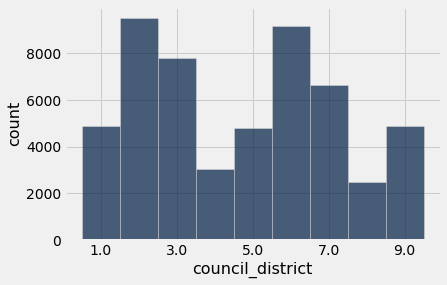

In [76]:
closed_requests = cleaned_requests.where('status', 'Closed')
closed_requests.group('council_district').bar('council_district')

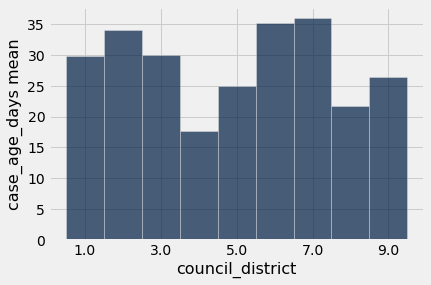

In [78]:
closed_requests.group('council_district', np.mean).bar('council_district', 'case_age_days mean')

In [80]:
closed_requests.sort('case_age_days', descending=True).item(0)

date_requested,date_updated,case_age_days,status,council_district,comm_plan_code,public_description
2017-10-14T05:16:00,2019-04-11T00:00:00,544,Closed,6,6,"SIDEWALK LEADS TO PATHWAY, VEGETATION & TRASH DEBRIS NEE ..."


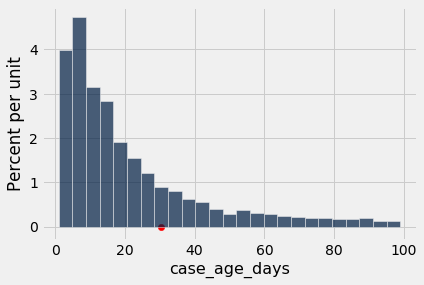

In [91]:
closed_requests.where('case_age_days', are.below(100)).hist('case_age_days', bins=25)
avg_resolution = np.mean(closed_requests.column('case_age_days'))
plots.scatter(avg_resolution, 0, color = 'red', s=40);

# 2. Illegal Dumping Reports
https://data.sandiego.gov/datasets/gid-illegal-dumping/

Run the following cell to download data

In [126]:
# get data
!wget -nc http://seshat.datasd.org/get_it_done_311/get_it_done_illegal_dumping_requests_datasd_v1.csv

--2019-08-26 06:45:50--  http://seshat.datasd.org/get_it_done_311/get_it_done_illegal_dumping_requests_datasd_v1.csv
Resolving seshat.datasd.org (seshat.datasd.org)... 52.216.10.170
Connecting to seshat.datasd.org (seshat.datasd.org)|52.216.10.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16717041 (16M) [binary/octet-stream]
Saving to: ‘get_it_done_illegal_dumping_requests_datasd_v1.csv’

get_it_done_illegal 100%[===================>]  15.94M  8.38MB/s    in 1.9s    

2019-08-26 06:45:55 (8.38 MB/s) - ‘get_it_done_illegal_dumping_requests_datasd_v1.csv’ saved [16717041/16717041]



In [159]:
dumping_reports = Table.read_table('get_it_done_illegal_dumping_requests_datasd_v1.csv')
dumping_reports.show(5)

service_request_id,service_request_parent_id,sap_notification_number,date_requested,case_age_days,service_name,case_record_type,date_updated,status,lat,lng,council_district,comm_plan_code,comm_plan_name,park_name,case_origin,specify_the_issue,referred,public_description
80482,nan,nan,2016-05-20T05:06:00,nan,Illegal Dumping,ESD Complaint/Report,nan,Referred,32.7276,-117.125,3,28,North Park,nan,Mobile,nan,nan,nan
80483,nan,nan,2016-05-20T05:07:00,nan,Illegal Dumping,ESD Complaint/Report,nan,Referred,32.7263,-117.125,3,8,Greater Golden Hill,nan,Mobile,nan,nan,nan
80490,nan,nan,2016-05-20T06:21:00,nan,Illegal Dumping,ESD Complaint/Report,nan,Referred,nan,nan,nan,nan,nan,nan,Email,nan,nan,nan
80572,nan,nan,2016-05-20T14:23:00,0,Illegal Dumping,ESD Complaint/Report,2016-05-20T00:00:00,Closed,32.7234,-117.128,3,8,Greater Golden Hill,nan,Web,nan,nan,nan
80597,nan,nan,2016-05-20T19:19:00,nan,Illegal Dumping,ESD Complaint/Report,nan,Referred,32.7173,-117.142,3,8,Greater Golden Hill,nan,Web,nan,nan,nan


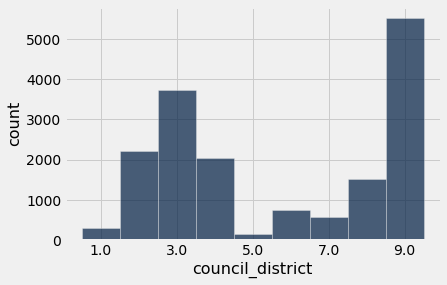

In [97]:
dumping_closed = dumping_reports.where('status', 'Closed').where('case_age_days', are.above(0)).where('council_district', are.above(0))
dumping_closed.group('council_district').bar('council_district')

In [115]:
dumping_reports.where('council_district', 9).column('comm_plan_name').item(0)

'College Area'

In [116]:
dumping_reports.group('public_description')

public_description,count
! Box Spring,1
! It's the apartment building and we're as a tenants alw ...,1
"""Boat/floater"" dumped at entry into penesquitos canyon ( ...",1
"""Community of Caring"" Donation Box (out of Fontana, CA) ...",1
"""Dead"" bike dumped, dirty, eyesore. Pollution. Public Ri ...",1
"""I want to report foul odors in Middletown area around t ...",1
"""Stuff"" In a shelter being kept on the beach",1
"""Urban Campers"" have left their trash again. The area b ...",1
"""on the trail at the end of murphy canyon road that is u ...",1
#02638200-908 Angelis Ave. Is incorrect this should be I ...,1


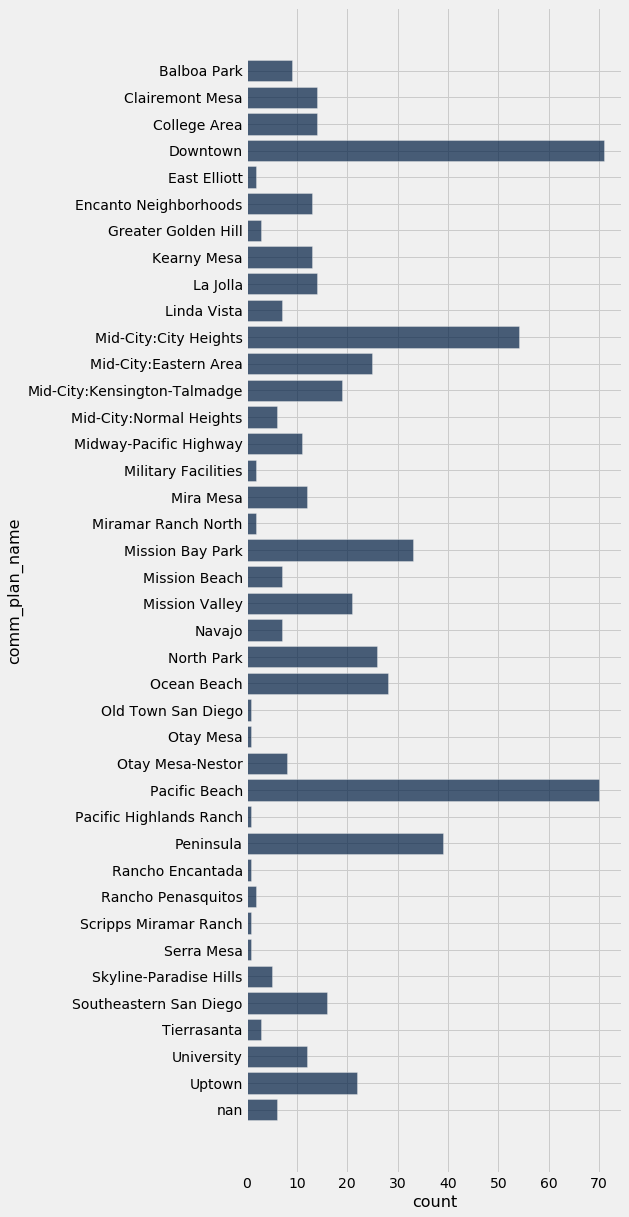

In [118]:
dumping_reports.where('public_description', are.containing('bike')).group('comm_plan_name').barh('comm_plan_name')

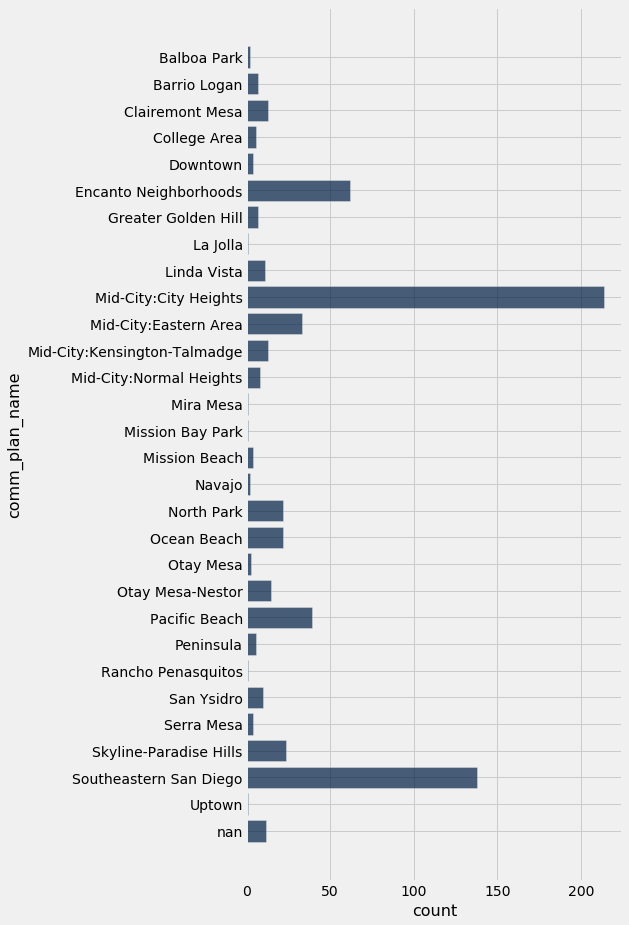

In [114]:
dumping_reports.where('public_description', are.containing('dresser')).group('comm_plan_name').barh('comm_plan_name')

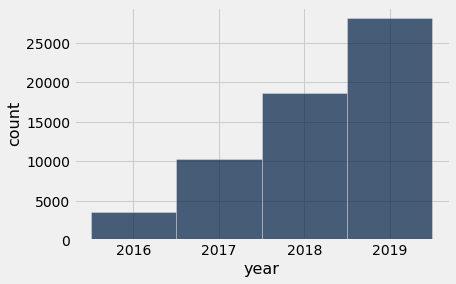

In [164]:
def stringdateToYear(stringdate):
    return int(stringdate.split('-')[0])
    
dumping_reports = dumping_reports.with_column('year', dumping_reports.apply(stringdateToYear,'date_requested'))
dumping_reports.group('year').bar('year')

# 3. Police Stops

Basic Details: https://data.sandiego.gov/datasets/police-ripa-stops/

Reason for Stop: https://data.sandiego.gov/datasets/police-ripa-stop-reason/

Property seized: https://data.sandiego.gov/datasets/police-ripa-prop-seize-type/

In [131]:
# get data
!wget -nc http://seshat.datasd.org/pd/ripa_stops_datasd.csv
!wget -nc http://seshat.datasd.org/pd/ripa_stop_reason_datasd.csv
!wget -nc http://seshat.datasd.org/pd/ripa_prop_seize_type_datasd.csv

File ‘ripa_stops_datasd.csv’ already there; not retrieving.

File ‘ripa_stop_reason_datasd.csv’ already there; not retrieving.

--2019-08-26 06:47:37--  http://seshat.datasd.org/pd/ripa_prop_seize_type_datasd.csv
Resolving seshat.datasd.org (seshat.datasd.org)... 52.216.237.202
Connecting to seshat.datasd.org (seshat.datasd.org)|52.216.237.202|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2899026 (2.8M) [application/octet-stream]
Saving to: ‘ripa_prop_seize_type_datasd.csv’

ripa_prop_seize_typ 100%[===================>]   2.76M  1.30MB/s    in 2.1s    

2019-08-26 06:47:40 (1.30 MB/s) - ‘ripa_prop_seize_type_datasd.csv’ saved [2899026/2899026]



In [169]:
police_reasons = Table.read_table('ripa_stop_reason_datasd.csv').where('reason_for_stop_code_text', are.not_equal_to('nan'))
police_reasons.show(5)

stop_id,pid,reason_for_stop,reason_for_stopcode,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation
2443,1,Reasonable Suspicion,64005,647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,Officer witnessed commission of a crime,"staggering, unable to safely walk"
2444,1,Traffic Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,Speeding
2447,1,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Matched suspect description,Both parties involved in argument.
2447,2,Reasonable Suspicion,53072,415(1) PC - FIGHT IN PUBLIC PLACE (M) 53072,Other Reasonable Suspicion of a crime,Both parties engaged in argument.
2448,1,Traffic Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,Moving Violation,UNSAFE DRIVING


reason_for_stop_code_text,count
65002 ZZ - LOCAL ORDINANCE VIOL (I) 65002,10034
602 PC - TRESPASSING (M) 32022,8690
22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,8462
647(E) PC - DIS CON:LODGE W/O CONSENT (M) 32111,8316
22450(A) VC - FAIL STOP VEH:XWALK/ETC (I) 54167,6622
65000 ZZ - LOCAL ORDINANCE VIOL (M) 65000,6588
647(F) PC - DISORD CONDUCT:ALCOHOL (M) 64005,5547
NA - XX ZZ - COMMUNITY CARETAKING (X) 99990,5042
23123.5 VC - NO HND HLD DEVICE W/DRIVE (I) 54655,4460
21461(A) VC - DRIVER FAIL OBEY SIGN/ETC (I) 54146,4261


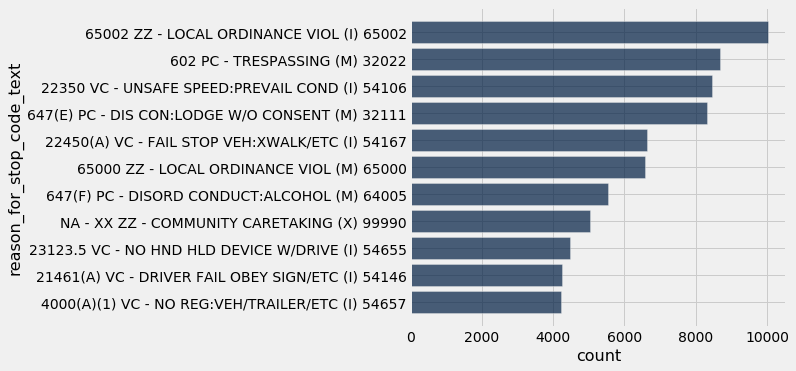

In [177]:
# police_reasons.group('reason_for_stop_code_text').sort('count', descending=True).show(10)
# top_reasons = police_reasons.group('reason_for_stopcode').sort('count', descending=True).take[:10]
# top_reasons.show()
# top_reasons.barh('reason_for_stopcode')

top_reasons = police_reasons.group('reason_for_stop_code_text').sort('count', descending=True).take[:11]
top_reasons.show()
top_reasons.barh('reason_for_stop_code_text')


type_of_property_seized,count
Drugs/narcotics,1641
Drug Paraphernalia,1201
Vehicle,624
Other Contraband or evidence,578
Cell phone(s) or electronic device(s),408
Weapon(s) other than a firearm,368
Suspected Stolen property,276
Money,237
Alcohol,210
Firearm(s),200


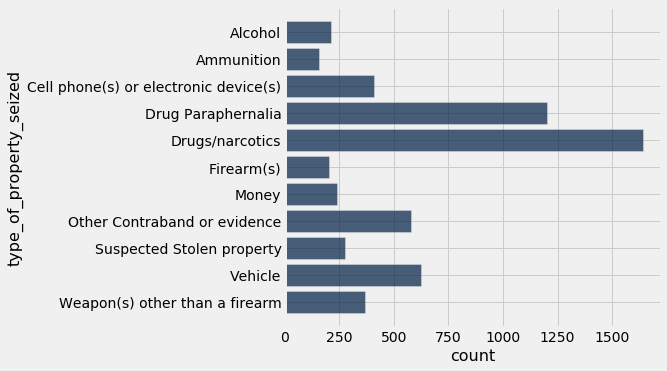

In [168]:
property_seized = Table.read_table('ripa_prop_seize_type_datasd.csv').where('type_of_property_seized', are.not_equal_to('nan'))
property_seized.group('type_of_property_seized').sort('count', descending=True).show(12)
property_seized.group('type_of_property_seized').barh('type_of_property_seized')